## T2-1. 타이타닉 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

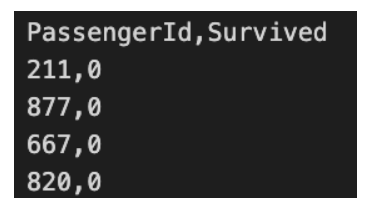

In [19]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../data/Titanic.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

#### 내 코드

In [20]:
import pandas as pd

X_train.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [21]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [22]:
X_train['SibSp'].value_counts()

0    482
1    168
2     23
4     16
3     14
8      5
5      4
Name: SibSp, dtype: int64

In [23]:
X_train['Parch'].value_counts()

0    536
1     96
2     69
3      4
4      3
5      3
6      1
Name: Parch, dtype: int64

In [24]:
X_train['Cabin'].isna().sum()

542

In [25]:
X_train['Embarked'].value_counts()

S    514
C    141
Q     56
Name: Embarked, dtype: int64

In [26]:
# 피쳐 선정
features = ["Pclass", "Gender", "SibSp", "Parch", "Embarked"]

X_ = pd.get_dummies(X_train[features])
X_

,Pclass,SibSp,Parch,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
90,3,0,0,0,1,0,0,1
103,3,0,0,0,1,0,0,1
577,1,1,0,1,0,0,0,1
215,1,1,0,1,0,1,0,0
191,2,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
621,1,1,0,0,1,0,0,1
128,3,1,1,1,0,1,0,0
57,3,0,0,0,1,1,0,0
341,1,3,2,1,0,0,0,1


In [27]:
test = pd.get_dummies(X_test[features])

In [30]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_, y_train['Survived'])
#y_pred = lr_bin.predict_proba(test)[:, 1]
y_pred = lr.predict(test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [31]:
lr.score(X_, y_train['Survived'])

0.8103932584269663

In [29]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': y_pred})
output.head(10)

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,1
111,112,1
356,357,1
699,700,0
619,620,0
548,549,0


In [ ]:
#output.to_csv('파일명.csv', index=False)

#### 예제 코드

In [32]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

In [33]:
# 생존 비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

In [35]:
y = y_train["Survived"]

# Gender만 원핫인코딩 됨
features = ["Pclass", "Gender", "SibSp", "Parch"]
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [36]:
X.shape, test.shape

((712, 5), (179, 5))

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X, y)
predictions = model.predict(test)

In [38]:
model.score(X, y)

0.8356741573033708

In [39]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0
